***
### How Surprise works?

Surprise provides a bunch of built-in algorithms. All algorithms derive from the AlgoBase base class, where are implemented some key methods (e.g. predict, fit and test). The list and details of the available prediction algorithms can be found in the prediction algorithms package documentation.

**Source: https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html*
***

# Data To Surpise Format

In [1]:
#load packages and functions

%run ./All_Functions.py

#load extra data 
products_df = pd.read_csv("./data/Products.csv")
customers_df = pd.read_csv("./data/Customers.csv")


C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
#specify rating type
rating_column='Quantity'
#Leave One Out Test or normal fit
leave_one_out=False
loo_rate='-'

In [53]:
#get data , choose rating column 
train , test , rating_column = load_dill(rating_column=rating_column,load_cv=False)


#transform trianset , create antitestset 
data , rating_column = read_data(data=train,rating_column=rating_column)
print(rating_column)

#trainset preview 
train.shape

Quantity


(67107, 3)

### Leave One Out Test

##### removes from the train dataframe each customer's highest rated product 


In [54]:
leave_one_out=True
# rating_column=''
LOO=True
precision='-'
recall='-'

#create trainset 
(loo_train,highest_rated_products ,rating_column)=Leave_highest_rating_out(dataframe=train)

#to surprise format
data,rating_column=read_data(data=loo_train,rating_column=rating_column,trainset=False,anti_test=False)
train=loo_train


Rows before: 67107 

Rows after: 61559 



### Sparse Matrix

Only 3% of Customer-Product interactions is known. Have to predict the rest 97% .

In [5]:
calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df
                    ,customers_df=customers_df,matrix_display='id',compressed=False).iloc[:10,:5]

Sparsity: 0.97


ProductId,00BEC3E7-E598-E911-80CF-000D3AB18B8E,00D466F8-CD4E-EA11-A81F-000D3A497E15,014C107A-E898-E911-80CF-000D3AB18B8E,01C94D28-E498-E911-80CF-000D3AB18B8E,02BEC3E7-E598-E911-80CF-000D3AB18B8E
CustomerId,,,,,
000CAC9C-AF57-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0
001C2C84-A312-EA11-A81C-000D3A497E15,0.0,0.0,0.0,2.0,0.0
002861E1-5721-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0
00382A56-9D15-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0
00459F71-952D-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0
004D58CE-2A38-EA11-A81E-000D3A497E15,0.0,0.0,0.0,0.0,0.0
0061F14B-F54F-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0
00621410-9212-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0
0064A8A3-1E33-EA11-A81D-000D3A497E15,0.0,0.0,0.0,1.0,0.0


# First look
### Cross Validation

In [6]:
#crete randomized dataset as to conduct cross validation results 
cv_train , cv_test =  train_test_split(train,test_size=0.2,random_state=0)
#data to surprise mode
cv_train , rating =read_data(data=train,rating_column=rating_column,trainset=False,anti_test=False)

#cross validate for every algorithm in the Surprise library
algos=[NMF(),SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(),
       KNNWithZScore(), BaselineOnly(), CoClustering()]

#For negative values NMF raises an error
if rating_column in ['Bias1']:
    #remove NMF 
    algos.pop(0)
       
#get results
results_cv , finish =cross_validation(data=cv_train,algorithm=algos,measures=['rmse'],
                                      cv=5,return_train_measures=True,verbose=True,n_jobs=2)
results_cv , finish

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    30.8683 26.0473 26.6778 64.3539 21.5666 33.9028 15.5085 
RMSE (trainset)   11.2590 11.0738 10.0623 5.3352  13.2401 10.1941 2.6386  
Fit time          6.91    7.05    10.71   10.46   5.72    8.17    2.02    
Test time         0.21    0.22    0.34    0.30    0.15    0.24    0.07    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    6930.65126930.74246931.00986930.77156930.39146930.71320.1998  
RMSE (trainset)   6930.72886930.70606930.63916930.69876930.79376930.71330.0499  
Fit time          5.77    5.85    6.73    6.69    4.15    5.84    0.94    
Test time         0.26    0.25    0.25    0.30    0.14    0.24    0.06    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)

(                 test_rmse  train_rmse  fit_time  test_time
 Algorithm                                                  
 BaselineOnly        27.040      30.707     0.087      0.121
 KNNBaseline         27.364       3.096     5.447     17.138
 KNNBasic            27.435       0.844     6.328     15.730
 SlopeOne            28.216      29.925     0.188      0.299
 KNNWithMeans        28.549       6.053     5.322     14.300
 KNNWithZScore       32.357      14.267     5.844     14.612
 NMF                 33.903      10.194     8.169      0.242
 NormalPredictor     38.071      39.354     0.114      0.175
 CoClustering        46.640      19.235     2.231      0.122
 SVD               6930.713    6930.713     5.836      0.242
 SVDpp             6930.713    6930.713    26.553      0.542,
 1100.5576860904694)

In [7]:
results_cv

,test_rmse,train_rmse,fit_time,test_time
Algorithm,,,,
BaselineOnly,27.040,30.707,0.087,0.121
KNNBaseline,27.364,3.096,5.447,17.138
KNNBasic,27.435,0.844,6.328,15.730
SlopeOne,28.216,29.925,0.188,0.299
KNNWithMeans,28.549,6.053,5.322,14.300
KNNWithZScore,32.357,14.267,5.844,14.612
NMF,33.903,10.194,8.169,0.242
NormalPredictor,38.071,39.354,0.114,0.175
CoClustering,46.640,19.235,2.231,0.122


### Load Results CV

In [8]:
# #load cv results based on rating column
results_cv=round(load_dill(rating_column=rating_column,load_cv=True) , 3)
results_cv

,test_rmse,train_rmse,fit_time,test_time
Algorithm,,,,
BaselineOnly,27.129,30.716,0.090,0.121
KNNBasic,27.311,0.843,5.502,13.053
KNNBaseline,27.746,3.118,5.852,15.160
SlopeOne,28.326,29.855,0.205,0.358
KNNWithMeans,29.093,6.198,5.578,14.117
KNNWithZScore,33.525,13.421,5.868,14.183
NMF,34.230,10.842,6.260,0.152
CoClustering,37.552,19.088,2.481,0.172
NormalPredictor,37.961,39.368,0.122,0.182


In [9]:
# #algorithm with lowest RMSE
algo=load_dill(rating_column=rating_column,load_cv=True)[:1].index[0]
algo

'BaselineOnly'

# Hyperparameter Tunning 

In [10]:
algo='BaselineOnly'
#perform Randomized Search
(score, parameters, time_elapsed, info, algorithm) = Grid_Search(data=data,algorithm=BaselineOnly,
                                                                 param_grid=get_paramgrid(algo),Grid_Search=False,cv=5,
                                                                 measures=['rmse'],joblib_verbose=8,n_iter=5,n_jobs=1)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


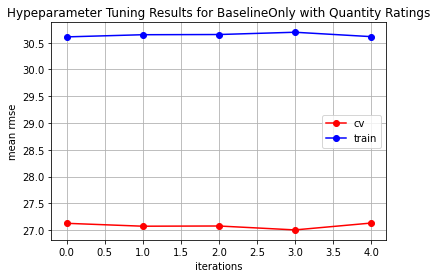

In [11]:
#plot Hyperparameter results 

plt.plot(info['mean_test_rmse'],color='r',label='cv',marker='o')
#train rmse
plt.plot(info['mean_train_rmse'],color='b',label='train',marker='o')
plt.legend()
plt.title('Hypeparameter Tuning Results for {0} with {1} Ratings'.format(algo,rating_column))
plt.xlabel('iterations')
plt.ylabel('mean rmse')
plt.grid()
 

In [12]:
#detailed dataframe 
# info.sort_values('mean_test_rmse')
info

,split0_test_rmse,split0_train_rmse,split1_test_rmse,split1_train_rmse,split2_test_rmse,split2_train_rmse,split3_test_rmse,split3_train_rmse,split4_test_rmse,split4_train_rmse,...,std_train_rmse,rank_test_rmse,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_bsl_options,Search,algo
0,18.746903,33.956140,16.931449,34.186762,62.590986,16.951310,18.685795,33.983042,18.671422,33.966532,...,6.829252,4,0.161306,0.027070,0.092175,0.035133,"{'bsl_options': {'method': 'als', 'random_stat...","{'method': 'als', 'random_state': 250, 'n_epoc...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
1,18.662429,33.994286,16.861024,34.223487,62.582065,17.007779,18.643648,34.016240,18.607324,34.003717,...,6.821191,2,0.135186,0.013554,0.082188,0.011028,"{'bsl_options': {'method': 'als', 'random_stat...","{'method': 'als', 'random_state': 250, 'n_epoc...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
2,18.667589,33.997615,16.864673,34.226998,62.583841,17.013568,18.648070,34.019547,18.612019,34.007043,...,6.820223,3,0.062973,0.007956,0.074974,0.008443,"{'bsl_options': {'method': 'als', 'random_stat...","{'method': 'als', 'random_state': 250, 'n_epoc...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
3,18.553561,34.039640,16.771826,34.266545,62.570441,17.068689,18.589242,34.055076,18.524732,34.047332,...,6.813914,1,0.117234,0.002623,0.070847,0.010126,"{'bsl_options': {'method': 'als', 'random_stat...","{'method': 'als', 'random_state': 250, 'n_epoc...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
4,18.753212,33.960186,16.935912,34.191072,62.593042,16.958454,18.691060,33.987073,18.676927,33.970639,...,6.828045,5,0.115304,0.004843,0.067882,0.010910,"{'bsl_options': {'method': 'als', 'random_stat...","{'method': 'als', 'random_state': 250, 'n_epoc...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...


In [13]:
#best score and parameters according to rmse
score ,parameters['rmse']

({'rmse': 27.00196032699025},
 {'bsl_options': {'method': 'als',
   'random_state': 250,
   'n_epochs': 10,
   'reg_u': 15,
   'reg_i': 10}})

# Training

### Get Predictions

In [14]:
#in case of no Hyperparameter tunning , input is an object algorithm
# algorithm=BaselineOnly


In [55]:
#predictions for the items the user HAS NOT BOUGHT 
predictions,fit_time=get_predictions(data=data,algo=algorithm,anti_test=True,provided_test=None)
#preview
predictions[:2]

#accuracy.rmse(predictions)

Estimating biases using als...


[Prediction(uid='FFFBF309-4138-EA11-A81E-000D3A497E15', iid='CEDC48A5-E998-E911-80CF-000D3AB18B8E', r_ui=3.8938579249175587, est=3.310373851568377, details={'was_impossible': False}),
 Prediction(uid='FFFBF309-4138-EA11-A81E-000D3A497E15', iid='E3E5129F-E998-E911-80CF-000D3AB18B8E', r_ui=3.8938579249175587, est=4.024109325733957, details={'was_impossible': False})]

#### estimations vs true values

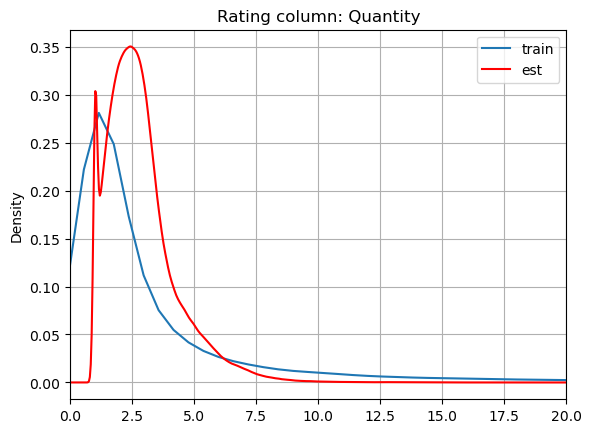

In [56]:
estimations=pd.DataFrame(predictions)

train[rating_column].plot(kind='kde',label='train')
plt.title('Rating column: {0}'.format(rating_column))
estimations['est'].plot(kind='kde',color='red',label='est')
plt.xlim(0,20)
plt.grid()
plt.legend()
 

# Recommendations
## Rank Predicitons , Top N

In [57]:
#get topN for each customer 
N=5
output ,N = recommend(products_df=products_df,customers_df=customers_df,predictions=predictions,N=N)

In [58]:
#preview
output[:5]

,CustomerName,Top5,Top5_Ids
000CAC9C-AF57-EA11-A81F-000D3A497E15,Σπύρος Οικονόμου,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...","[EA992BE3-EA98-E911-80CF-000D3AB18B8E, CADC48A..."
001C2C84-A312-EA11-A81C-000D3A497E15,Μιχάλης Παρασκευόπουλος,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...","[EA992BE3-EA98-E911-80CF-000D3AB18B8E, CADC48A..."
002861E1-5721-EA11-A81D-000D3A497E15,Δημητρα Λουστροπούλου,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...","[EA992BE3-EA98-E911-80CF-000D3AB18B8E, CADC48A..."
00459F71-952D-EA11-A81D-000D3A497E15,Stylianos Voulgaridis,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...","[EA992BE3-EA98-E911-80CF-000D3AB18B8E, CADC48A..."
004D58CE-2A38-EA11-A81E-000D3A497E15,Δημητρα Στρατη,"[CAPPUCCINO CALDO REGULAR(TAXI), ΣΤΙΓΜΙΑΙΟΣ ΚΡ...","[EA992BE3-EA98-E911-80CF-000D3AB18B8E, CF7951E..."


### TopNs Ranking


In [59]:
topn=count_topn_occurances(recommendations=output,return_recommendations_df=False,N=N)
topn

Unique Topn: 106


,Top5,Times_recommended,top1,top2,top3,top4,top5
0,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...",1247,CAPPUCCINO CALDO REGULAR(TAXI),CAP CALDO REGULAR BRAZILIAN,ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L"
1,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...",1123,CAPPUCCINO CALDO REGULAR(TAXI),CAP CALDO REGULAR BRAZILIAN,ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO BRAZILIAN,CALDO GRANDE BRAZILIAN
2,"[CAPPUCCINO CALDO REGULAR(TAXI), ΣΤΙΓΜΙΑΙΟΣ ΚΡ...",475,CAPPUCCINO CALDO REGULAR(TAXI),ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L",CALDO GRANDE BRAZILIAN
3,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...",446,CAPPUCCINO CALDO REGULAR(TAXI),CAP CALDO REGULAR BRAZILIAN,ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI)
4,"[CAPPUCCINO CALDO REGULAR(TAXI), ΣΤΙΓΜΙΑΙΟΣ ΚΡ...",442,CAPPUCCINO CALDO REGULAR(TAXI),ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO BRAZILIAN,CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI)
...,...,...,...,...,...,...,...
101,"[CAP CALDO REGULAR BRAZILIAN, ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ...",1,CAP CALDO REGULAR BRAZILIAN,ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO BRAZILIAN,CALDO GRANDE BRAZILIAN,FRAPPE GRANDE
102,"[CAPPUCCINO CALDO REGULAR(TAXI), ΣΤΙΓΜΙΑΙΟΣ ΚΡ...",1,CAPPUCCINO CALDO REGULAR(TAXI),ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO ARABICA,FRAPPE GRANDE,FRAPPE REGULAR
103,"[CAPPUCCINO CALDO REGULAR(TAXI), CAP CALDO REG...",1,CAPPUCCINO CALDO REGULAR(TAXI),CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,ESP CALDO REG(TAXI),FRAPPE GRANDE
104,"[CAPPUCCINO CALDO REGULAR(TAXI), ΣΤΙΓΜΙΑΙΟΣ ΚΡ...",1,CAPPUCCINO CALDO REGULAR(TAXI),ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),ESPRESSO FREDDO BRAZILIAN,CAPPUCCINO FREDDO REGULAR(TAXI),ESPRESSO FREDDO ARABICA


### Unique Recommendations

In [60]:
#unique recommendations   
unique_topNs=topn.shape[0] / train['CustomerId'].nunique() * 100
print("Unique recommendations per customer: {0}%".format(round(unique_topNs ,2)))

Unique recommendations per customer: 1.92%


### Check Product Existence In TopN


In [61]:
# product='CLUB SANDWICH ΜΕ ΠΑΤΑΤΕΣ'
# count_product_in_topn(product_name=product,recommendations=output)

count_product_in_topn(product_name='ESPRESSO FREDDO ARABICA',recommendations=output)

False    5507
True       15
Name: topn_to_str, dtype: int64

### Products in TopN

In [62]:
product_popularity_in_recommendations(recommendation_df=output,N=N)

Unique products in all TopN: 16 


{'ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI)': 5479,
 'CAPPUCCINO CALDO REGULAR(TAXI)': 5414,
 'CALDO GRANDE BRAZILIAN': 3651,
 'ESPRESSO FREDDO BRAZILIAN': 3646,
 'CAP CALDO REGULAR BRAZILIAN': 3624,
 'ΑΥΡΑ ΝΕΡΟ 0,5L': 2708,
 'ESP FREDDO REG(TAXI)': 2134,
 'ESP CALDO REG(TAXI)': 749,
 'CAPPUCCINO FREDDO REGULAR(TAXI)': 127,
 'FRAPPE GRANDE': 39,
 'ESPRESSO FREDDO ARABICA': 15,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ GRANDE': 14,
 'FRAPPE REGULAR': 5,
 'VEGAN CAP. CALDO REGULAR': 2,
 'ΚΟΥΛΟΥΡΙ ΣΙΚΑΛΗΣ ΘΕΣ.': 2,
 'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG': 1}

### Unique Products In TopN


In [63]:
unique_TopN_products=len(product_popularity_in_recommendations(recommendation_df=output,N=N)) / train['ProductId'].nunique() *100
print("Unique products in recommendations : {0}%".format(round(unique_TopN_products ,2)))

Unique products in all TopN: 16 
Unique products in recommendations : 3.8%


# Evaluation

## Hit Rate

In [64]:
(hit_rate ,hits ,count_customers ,timing ,products_in_hits ,threshold,customer_dicts) = calculate_accuracy(recommend=output,train=train,
                                                    test=test,products_df=products_df,customers_df=customers_df,threshold=1,N=N,show=False)
 

Time:
Accuracy:


In [65]:
(hit_rate ,hits ,count_customers ,timing ,products_in_hits[:2] ,threshold) 

(0.5,
 2737,
 5453,
 362.1311905384064,
 ['ESPRESSO FREDDO BRAZILIAN', 'ΑΥΡΑ ΝΕΡΟ 0,5L'],
 1)

In [66]:
customer_dicts[:1]

[defaultdict(int,
             {'CustomerId': '000CAC9C-AF57-EA11-A81F-000D3A497E15',
              'CustomerName': 'Σπύρος Οικονόμου',
              'Recommendations': ['CAPPUCCINO CALDO REGULAR(TAXI)',
               'CAP CALDO REGULAR BRAZILIAN',
               'ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI)',
               'ESPRESSO FREDDO BRAZILIAN',
               'ΑΥΡΑ ΝΕΡΟ 0,5L'],
              'Will_buy': ['ESPRESSO FREDDO ARABICA',
               'ΧΕΙΡΟΠ. ΑΥΘ. ΠΟΛΙΤΙΚΗ ΚΟΥΡΟΥ',
               'ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.',
               'ESPRESSO FREDDO BRAZILIAN',
               'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ΧΩΡ. ΣΠΑΝΑΚΟΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ'],
              'Hits_number': 1,
              'Hits': ['ESPRESSO FREDDO BRAZILIAN'],
              'Prior_purchases': ['ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ESPR CALDO REGULAR BRAZILIAN',
               'ESPRESSO FREDDO ARABICA',
               'FREDDO REGULAR ARABICA',
               'FRAPPE REGULAR',
               'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR

### Recommendation Results preview 

In [67]:
#number of customer results to load
n=10
customers=pd.Series(output.index).sample(n).values
 
for customer in customers:
    recommendation_results(customer=customer,recommendation=output,train=train,test=test,products_df=products_df,customers_df=customers_df,
                        N=N,return_values=False,show=True)

CustomerId: 19C8B630-5113-EA11-A81C-000D3A497E15 , Customer Name: ATHANASIOS KARAKITSOS
Recommendations:
 ['CAPPUCCINO CALDO REGULAR(TAXI)', 'CAP CALDO REGULAR BRAZILIAN', 'ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI)', 'ΑΥΡΑ ΝΕΡΟ 0,5L', 'CALDO GRANDE BRAZILIAN']
Will buy:
 ['CALDO GRANDE ARABICA', 'CALDO GRANDE BRAZILIAN', 'FREDDO GRANDE BRAZILIAN']
Hits:
 1 ['CALDO GRANDE BRAZILIAN'] 
Prior Purchases:
 ['FREDDO GRANDE BRAZILIAN', 'FRULITE ON THE GO ΠΟΡΤΟΚΑΛΙ-ΒΕΡΥΚΟΚΟ 500ml', 'ESPRESSO FREDDO BRAZILIAN']
Prior Purchases in Recommendations:
 (0, [])
New Products: 2 
 ['CALDO GRANDE BRAZILIAN', 'CALDO GRANDE ARABICA'] 


CustomerId: 42509ACF-7A1D-EA11-A81D-000D3A497E15 , Customer Name: Γεωργιος Αποστολακης
Recommendations:
 ['CAPPUCCINO CALDO REGULAR(TAXI)', 'ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI)', 'ESPRESSO FREDDO BRAZILIAN', 'ΑΥΡΑ ΝΕΡΟ 0,5L', 'CALDO GRANDE BRAZILIAN']
Will buy:
 ['FREDDO REGULAR ARABICA', 'CALDO SINGLE BRAZILIAN', 'FREDDO REGULAR BRAZILIAN', 'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ', 'CALDO SINGLE ARABICA']

### What Products Have The Most Hits?

In [68]:
hit_popularity_matrix(hit_products=products_in_hits)

,Product,Hits
1,ESPRESSO FREDDO BRAZILIAN,1281
2,"ΑΥΡΑ ΝΕΡΟ 0,5L",985
3,CAP CALDO REGULAR BRAZILIAN,697
4,CALDO GRANDE BRAZILIAN,257
5,ESP FREDDO REG(TAXI),48
6,CAPPUCCINO CALDO REGULAR(TAXI),41
7,CAPPUCCINO FREDDO REGULAR(TAXI),12
8,ΣΤΙΓΜΙΑΙΟΣ ΚΡΥΟΣ REGULAR(TAXI),9
9,ESP CALDO REG(TAXI),8
10,ESPRESSO FREDDO ARABICA,5


## Precusion@N & Recall@N : 

![image info](./Precision_Recall_table_zoom.png)


 
***
•	TP: The algorithm predicts that the user is going to buy the product (recommendation) and the user actually buys the product.

•	FP: The algorithm recommends the product but the user does not buy it.


•	FN: The algorithm doe not recommend the product but the user buys it.

•	TN: The algorithm does not recommend the product, the user does not buy the product.


***
                                         Precision = TP / TP + TN , (# of Hits / Recommendations)



***
                                         Recall = TP / TP + FN , (# of Hits / Recommendations)

***

In [69]:
precision, recall, precision_d , recall_d = precision_recall_at_N(recommendation_results=customer_dicts,count_customers=count_customers,
                                                                  products_df=products_df,customers_df=customers_df,N=N)

0.12 0.18


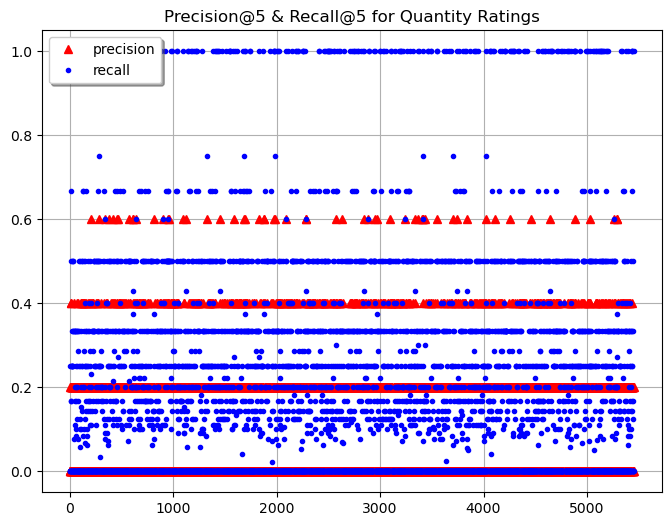

In [70]:
plt.style.use('default')

plt.figure(figsize=(8,6))
plt.plot(precision_d.values(),'r^',label='precision')
plt.plot(recall_d.values(),'b.',label='recall')
plt.grid()
plt.legend(loc='best',shadow=True)
plt.title("Precision@{0} & Recall@{1} for {2} Ratings".format(N,N,rating_column));

### Choose N

In [71]:
# k_list=[3,5,10]
# precision_k=[]
# recall_k=[]
# precision_for_k=[]
# recall_for_k=[]

# for k in k_list:
#    print(k)
   
#    customer_dicts=[]
#    #recommendations for k
#    output ,k = recommend(products_df=products_df,customers_df=customers_df,predictions=predictions,N=k)
#    for customer in output.index:
#       temp_dict=recommendation_results(customer=customer,recommendation=output,train=train,test=test,
#                            products_df=products_df,customers_df=customers_df,N=k,return_values=True,show=False)
#       customer_dicts.append(temp_dict)

#    print('P&R loop {}'.format(k)) 
#    precision, recall, precision_d , recall_d = precision_recall_at_N(recommendation_results=customer_dicts, N=k)
 
#    precision_k.append(precision)
#    recall_k.append(recall)
#    #store customer values per k  
#    precision_for_k.append(precision_d)
#    recall_for_k.append(recall_d)




In [72]:
# #plot precision recall as to decide N 
# plt.plot(k_list, precision_k, '.r-',label='precision')
# plt.plot(k_list, recall_k, '.b-',label='recall')
# plt.legend()
# # plt.xlim(0,20)
# plt.xlabel('N');
# plt.xticks(k_list[:5])
# plt.title('Precision Recall N')
# plt.grid()

# """
# for i in range(0,3):
#     plt.style.use('default')

#     plt.figure(figsize=(6,4))
#     plt.plot(precision_for_k[i].values(),'r^',label='precision')
#     plt.plot(recall_for_k[i].values(),'b.',label='recall')
#     plt.grid()
#     plt.legend(loc='best',shadow=True)
#     plt.title("Precision@{0} & Recall@{1} for {2} Ratings".format(k_list[i],k_list[i],rating_column))
# """ 

In [73]:
# recall_df=pd.DataFrame(recall_d.items()).rename(columns={0:'CustomerId',1:'Recall@N'})
# recall1=recall_df.loc[recall_df['Recall@N']==1]

# [[entry  for entry in customer_dicts if entry['CustomerId'] in recall1['CustomerId'].values]]

## Logs

In [74]:
training_log(rating_column=rating_column,algo=algorithm,fit_time=fit_time,create_log=False,info=info,leave_one_out=leave_one_out)

,Date,Data,Algo,Tunning,Tunning_time,Best_parameters,Tunning_RMSE,Train_time,Leave_one_out
1,2021-10-13 16:16:19.707387,Quantity,SVD,RandomizedSearchCV,0.561669,"{'n_factors': 10, 'n_epochs': 10, 'lr_all': 0....",29.777515,27.82,False
2,2021-12-09 20:58:30.886440,Quantity,BaselineOnly,RandomizedSearchCV,0.134291,"{'bsl_options': {'method': 'als', 'random_stat...",27.363383,21.61,False
3,2021-12-09 21:14:20.966580,Quantity,NMF,RandomizedSearchCV,1.175717,"{'n_factors': 10, 'n_epochs': 10}",30.775008,26.27,False
4,2021-12-09 23:10:18.333972,Quantity,SVD,RandomizedSearchCV,0.51004,"{'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.0...",26.902606,27.69,False
5,2021-12-09 23:31:41.704706,Quantity,SVDpp,RandomizedSearchCV,10.498532,"{'n_factors': 20, 'n_epochs': 10, 'lr_all': 5....",26.709609,108.98,False
6,2021-12-09 23:46:21.871922,Frequency1,BaselineOnly,RandomizedSearchCV,0.422648,"{'bsl_options': {'method': 'sgd', 'learning_ra...",0.185284,16.13,False
7,2021-12-10 01:21:26.937052,Frequency1,KNNBaseline,RandomizedSearchCV,13.722675,"{'bsl_options': {'method': 'sgd', 'learning_ra...",0.191524,411.3,False
8,2021-12-10 10:13:37.162233,Frequency1,SVD,RandomizedSearchCV,0.379325,"{'n_factors': 10, 'n_epochs': 5, 'lr_all': 0.0...",0.186593,21.03,False
9,2021-12-10 10:25:57.572374,Frequency2,SVD,RandomizedSearchCV,0.981455,"{'n_factors': 30, 'n_epochs': 10, 'lr_all': 0....",7.928153,22.06,False
10,2021-12-10 10:53:04.506493,Frequency2,SVDpp,RandomizedSearchCV,22.997132,"{'n_factors': 20, 'n_epochs': 20, 'lr_all': 0....",7.807397,101.94,False


In [75]:
 evaluation_log(rating_column=rating_column,algo=algorithm,N=N,precision_avg=precision,recall_avg=recall,
                hit_rate=hit_rate,hits=hits,hit_threshold=threshold,count_customers=count_customers,time_elapsed=timing,
                unique_TopN=unique_topNs,unique_products=unique_TopN_products,loo_rate='-',leave_one_out=leave_one_out,create_log=False)

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


#### Leave One Out Evaluation


In [76]:
customer=train['CustomerId'].drop_duplicates().sample(1).values[0]
df=leave_one_out_info(customer=customer,data=train,removed_ratings=highest_rated_products,products_df=products_df,
                   customers_df=customers_df,rating_column=rating_column)
df

,index,Customer_Name,Product_Names,Quantity
0,17689,Κώστας Ο,ESPRESSO FREDDO BRAZILIAN,9.000000
1,17686,Κώστας Ο,ESPRESSO FREDDO ARABICA,2.000000
2,17691,Κώστας Ο,ESPR CALDO REGULAR BRAZILIAN,2.000000
3,17692,Κώστας Ο,FREDDO REGULAR BRAZILIAN,2.000000
4,17687,Κώστας Ο,FREDDO REGULAR ARABICA,1.000000
5,17688,Κώστας Ο,CAP CALDO REGULAR ARABICA,1.000000
6,17693,Κώστας Ο,ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ,1.000000
7,17690,Κώστας Ο,CAP CALDO REGULAR BRAZILIAN,33.000000


In [77]:
(in_topn_rate , in_topn , customerid_in_topn, time_passed) =LeaveOneOut_hitrate(left_out_products=highest_rated_products,recommendations=output,N=N)
(in_topn_rate , in_topn , customerid_in_topn[:2])

(0.36,
 1964,
 ['000CAC9C-AF57-EA11-A81F-000D3A497E15',
  '0061F14B-F54F-EA11-A81F-000D3A497E15'])

In [78]:
loo_rate=in_topn_rate
evaluation_log(rating_column=rating_column,algo=algorithm,N=N,precision_avg=precision,recall_avg=recall,
                hit_rate=hit_rate,hits=hits,hit_threshold=threshold,count_customers=count_customers,time_elapsed=timing,
                unique_TopN=unique_topNs,unique_products=unique_TopN_products,loo_rate=loo_rate,leave_one_out=leave_one_out,create_log=False)

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


In [79]:
#note that: in ev[index=1] the  first column results are after Leave_highest_rating_out on the train set 


                    -----------------------------------------------END------------------------------------------------------------